<h1 style="color:blue;"><center> WHAT TYPE OF FILMS SHOULD BE CREATING?</center>

  </h1>

<h2 style="color:green;"> Importing libraries</h2>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<h2 style="color:blue;"> Exploring the Data</h2>

In [ ]:
bom_movie_df = pd.read_csv('data/bom.movie_gross.csv.gz')

In [ ]:
bom_movie_df.info()

In [ ]:
bom_movie_df.head(1)

In [ ]:
bom_movie_df.describe().T

In [211]:
bom_movie_df['foreign_gross'].isna().sum()

1350

In [212]:
imdb_name_df = pd.read_csv('data/imdb.name.basics.csv.gz')

In [213]:
imdb_name_df.drop(['nconst', 'death_year','birth_year'], axis=1, inplace=True)

In [214]:
imdb_name_df.head(5)

,primary_name,primary_profession,known_for_titles
0,Mary Ellen Bauder,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,Joseph Bauer,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,Bruce Baum,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,Axel Baumann,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,Pete Baxter,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


In [215]:
imdb_name_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 3 columns):
primary_name          606648 non-null object
primary_profession    555308 non-null object
known_for_titles      576444 non-null object
dtypes: object(3)
memory usage: 13.9+ MB


In [216]:
imdb_title_akas_df = pd.read_csv('data/imdb.title.akas.csv.gz')

In [217]:
imdb_title_akas_df.drop('title_id', axis=1, inplace=True)

In [218]:
imdb_title_akas_df.head(1)

,ordering,title,region,language,types,attributes,is_original_title
0,10,Джурасик свят,BG,bg,NaN,NaN,0.0


In [219]:
imdb_title_akas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331703 entries, 0 to 331702
Data columns (total 7 columns):
ordering             331703 non-null int64
title                331703 non-null object
region               278410 non-null object
language             41715 non-null object
types                168447 non-null object
attributes           14925 non-null object
is_original_title    331678 non-null float64
dtypes: float64(1), int64(1), object(5)
memory usage: 17.7+ MB


In [220]:
imdb_title_basics_df = pd.read_csv('data/imdb.title.basics.csv.gz')

In [221]:
#imdb_title_basics_df.drop('tconst', axis=1, inplace=True)

In [222]:
#bom_movie_df merge with
imdb_title_basics_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [223]:
imdb_title_basics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
tconst             146144 non-null object
primary_title      146144 non-null object
original_title     146123 non-null object
start_year         146144 non-null int64
runtime_minutes    114405 non-null float64
genres             140736 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [224]:
imdb_title_basics_df['runtime_minutes'].isna().sum()

31739

In [225]:
imdb_title_basics_df.describe().T

,count,mean,std,min,25%,50%,75%,max
start_year,146144.0,2014.621798,2.733583,2010.0,2012.0,2015.0,2017.0,2115.0
runtime_minutes,114405.0,86.187247,166.360590,1.0,70.0,87.0,99.0,51420.0


In [226]:
imdb_title_crew_df = pd.read_csv('data/imdb.title.crew.csv.gz')

In [227]:
#imdb_title_crew_df.drop('tconst', axis=1, inplace=True)

In [228]:
imdb_title_crew_df.tail() #No need

,tconst,directors,writers
146139,tt8999974,nm10122357,nm10122357
146140,tt9001390,nm6711477,nm6711477
146141,tt9001494,"nm10123242,nm10123248",NaN
146142,tt9004986,nm4993825,nm4993825
146143,tt9010172,NaN,nm8352242


In [229]:
imdb_title_crew_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 3 columns):
tconst       146144 non-null object
directors    140417 non-null object
writers      110261 non-null object
dtypes: object(3)
memory usage: 3.3+ MB


In [230]:
imdb_title_crew_df['writers'].isna().sum()

35883

In [231]:
imdb_title_principales_df = pd.read_csv('data/imdb.title.principals.csv.gz')

In [232]:
imdb_title_principales_df.drop(['tconst', 'nconst'], axis=1, inplace=True)

In [233]:
imdb_title_principales_df['characters'].isna().sum()

634826

In [234]:
imdb_title_principales_df.head()

,ordering,category,job,characters
0,1,actor,NaN,"[""The Man""]"
1,2,director,NaN,NaN
2,3,producer,producer,NaN
3,10,editor,NaN,NaN
4,1,actress,NaN,"[""Beth Boothby""]"


In [235]:
imdb_title_principales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028186 entries, 0 to 1028185
Data columns (total 4 columns):
ordering      1028186 non-null int64
category      1028186 non-null object
job           177684 non-null object
characters    393360 non-null object
dtypes: int64(1), object(3)
memory usage: 31.4+ MB


In [236]:
imdb_title_principales_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ordering,1028186.0,4.739847,2.747446,1.0,2.0,4.0,7.0,10.0


In [237]:
imdb_title_ratings_df = pd.read_csv('data/imdb.title.ratings.csv.gz')

In [238]:
imdb_title_ratings_df.drop('tconst', axis=1, inplace=True)

In [239]:
imdb_title_ratings_df.head()

,averagerating,numvotes
0,8.3,31
1,8.9,559
2,6.4,20
3,4.2,50352
4,6.5,21


In [240]:
imdb_title_ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 2 columns):
averagerating    73856 non-null float64
numvotes         73856 non-null int64
dtypes: float64(1), int64(1)
memory usage: 1.1 MB


In [241]:
imdb_title_ratings_df.describe().T

,count,mean,std,min,25%,50%,75%,max
averagerating,73856.0,6.332729,1.474978,1.0,5.5,6.5,7.4,10.0
numvotes,73856.0,3523.662167,30294.022971,5.0,14.0,49.0,282.0,1841066.0


In [242]:
imdb_movies_df = pd.read_csv('data/tmdb.movies.csv.gz')

In [243]:
imdb_movies_df.drop(['Unnamed: 0', 'id','genre_ids'], axis =1, inplace = True)

In [244]:
imdb_movies_df.head()

,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [245]:
imdb_movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 7 columns):
original_language    26517 non-null object
original_title       26517 non-null object
popularity           26517 non-null float64
release_date         26517 non-null object
title                26517 non-null object
vote_average         26517 non-null float64
vote_count           26517 non-null int64
dtypes: float64(2), int64(1), object(4)
memory usage: 1.4+ MB


In [246]:
imdb_movies_df.describe().T

,count,mean,std,min,25%,50%,75%,max
popularity,26517.0,3.130912,4.355229,0.6,0.6,1.374,3.694,80.773
vote_average,26517.0,5.991281,1.852946,0.0,5.0,6.000,7.000,10.000
vote_count,26517.0,194.224837,960.961095,1.0,2.0,5.000,28.000,22186.000


<h2 style="color:blue;"> Cleaning Data</h2>


In [247]:
## Plots in the same campus
# fig = plt.figure()
# ax1 = fig.add_axes([0,0,1,1])
# ax1 = fig.add_axes([0.2,0.2,0.5,0.5])

In [248]:
# x = np.linspace(0,10,8)
# y = x**0.5

In [249]:
# Subplots
# plt.subplot(1,2,1)
# plt.plot(y,x, 'r')

# plt.subplot(1,2,2)
# plt.plot(x,y, 'b')

In [250]:
def graf_function(df):
    df_list = [imdb_movies_df,imdb_movies_df,imdb_title_ratings_df,imdb_title_principales_df,imdb_title_crew_df,imdb_title_basics_df,imdb_title_akas_df,imdb_name_df]
    for i, df in enumerate(df_list):
        fig, ax = plt.subplots(figsize=(12,4))
        graf_noise = sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis');
        i += 1
    return graf_noise
    
        




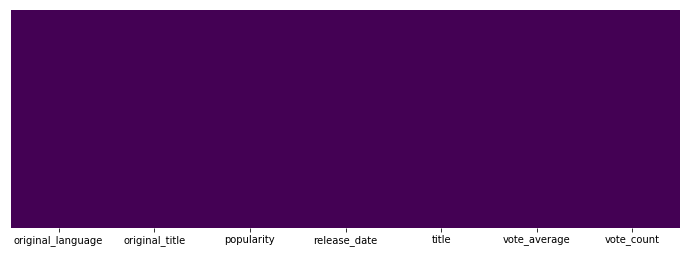

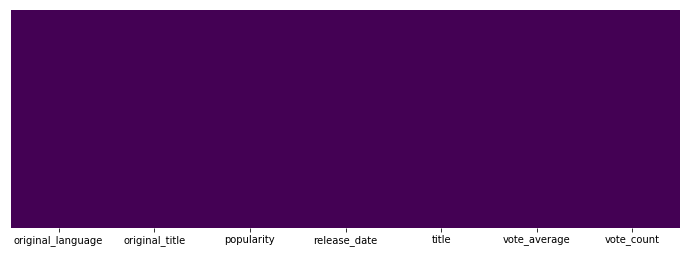

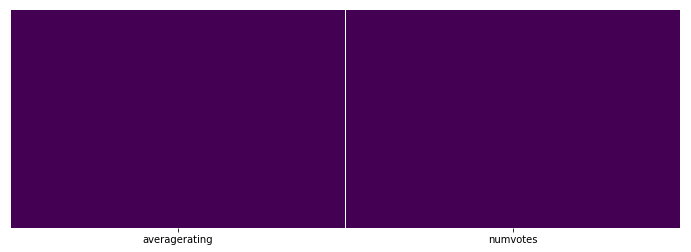

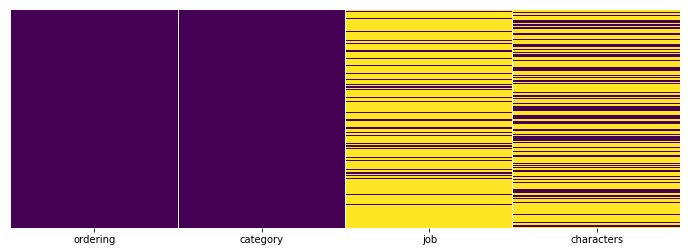

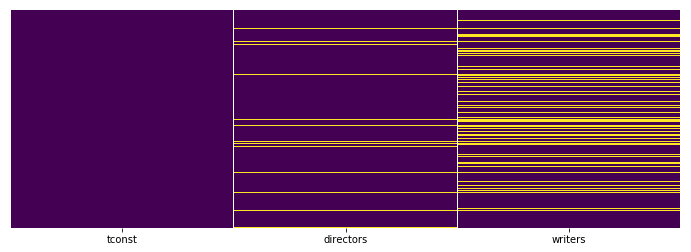

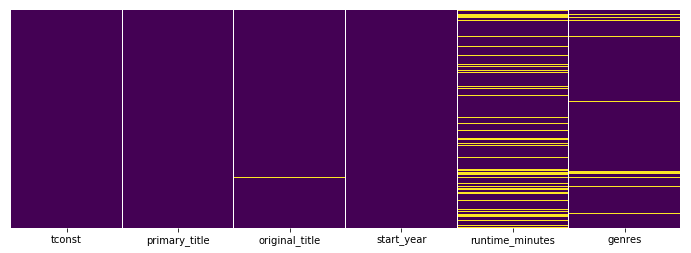

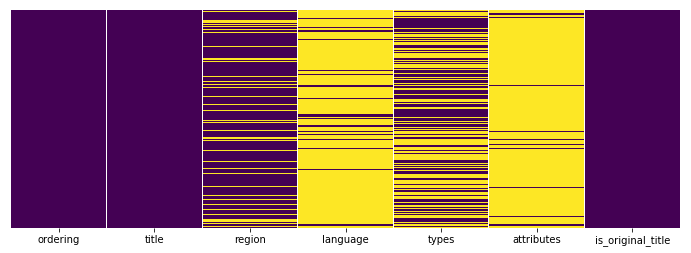

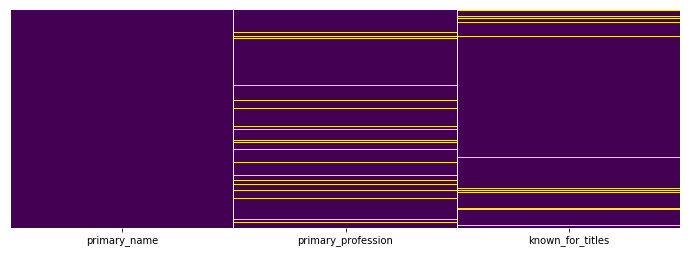

In [251]:
graf_function(imdb_title_akas_df)

In [252]:
imdb_name_df.head(2)

,primary_name,primary_profession,known_for_titles
0,Mary Ellen Bauder,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,Joseph Bauer,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"


In [253]:
df_list = [imdb_movies_df,imdb_title_ratings_df,imdb_title_basics_df,imdb_title_akas_df,imdb_name_df]



In [254]:
dfs = pd.concat(df_list, join='inner', axis=1)

In [255]:
dfs.head()

,original_language,original_title,popularity,release_date,title,vote_average,vote_count,averagerating,numvotes,ordering,...,ordering,title,region,language,types,attributes,is_original_title,primary_name,primary_profession,known_for_titles
0,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,8.3,31,1,...,10,Джурасик свят,BG,bg,NaN,NaN,0.0,Mary Ellen Bauder,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,8.9,559,2,...,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0,Joseph Bauer,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,6.4,20,3,...,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0,Bruce Baum,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,4.2,50352,10,...,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0,Axel Baumann,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,en,Inception,27.920,2010-07-16,Inception,8.3,22186,6.5,21,1,...,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0,Pete Baxter,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


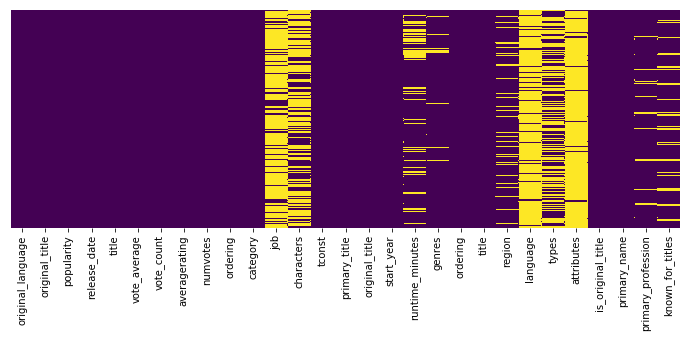

In [256]:
fig, ax = plt.subplots(figsize=(12,4))
plott_w_noise = sns.heatmap(dfs.isnull(), yticklabels=False, cbar=False, cmap='viridis');

In [257]:
dfs.loc[dfs['language'].isna(), 'language'] = 'en'

ValueError: color kwarg must have one color per data set. 2 data sets and 1 colors were provided

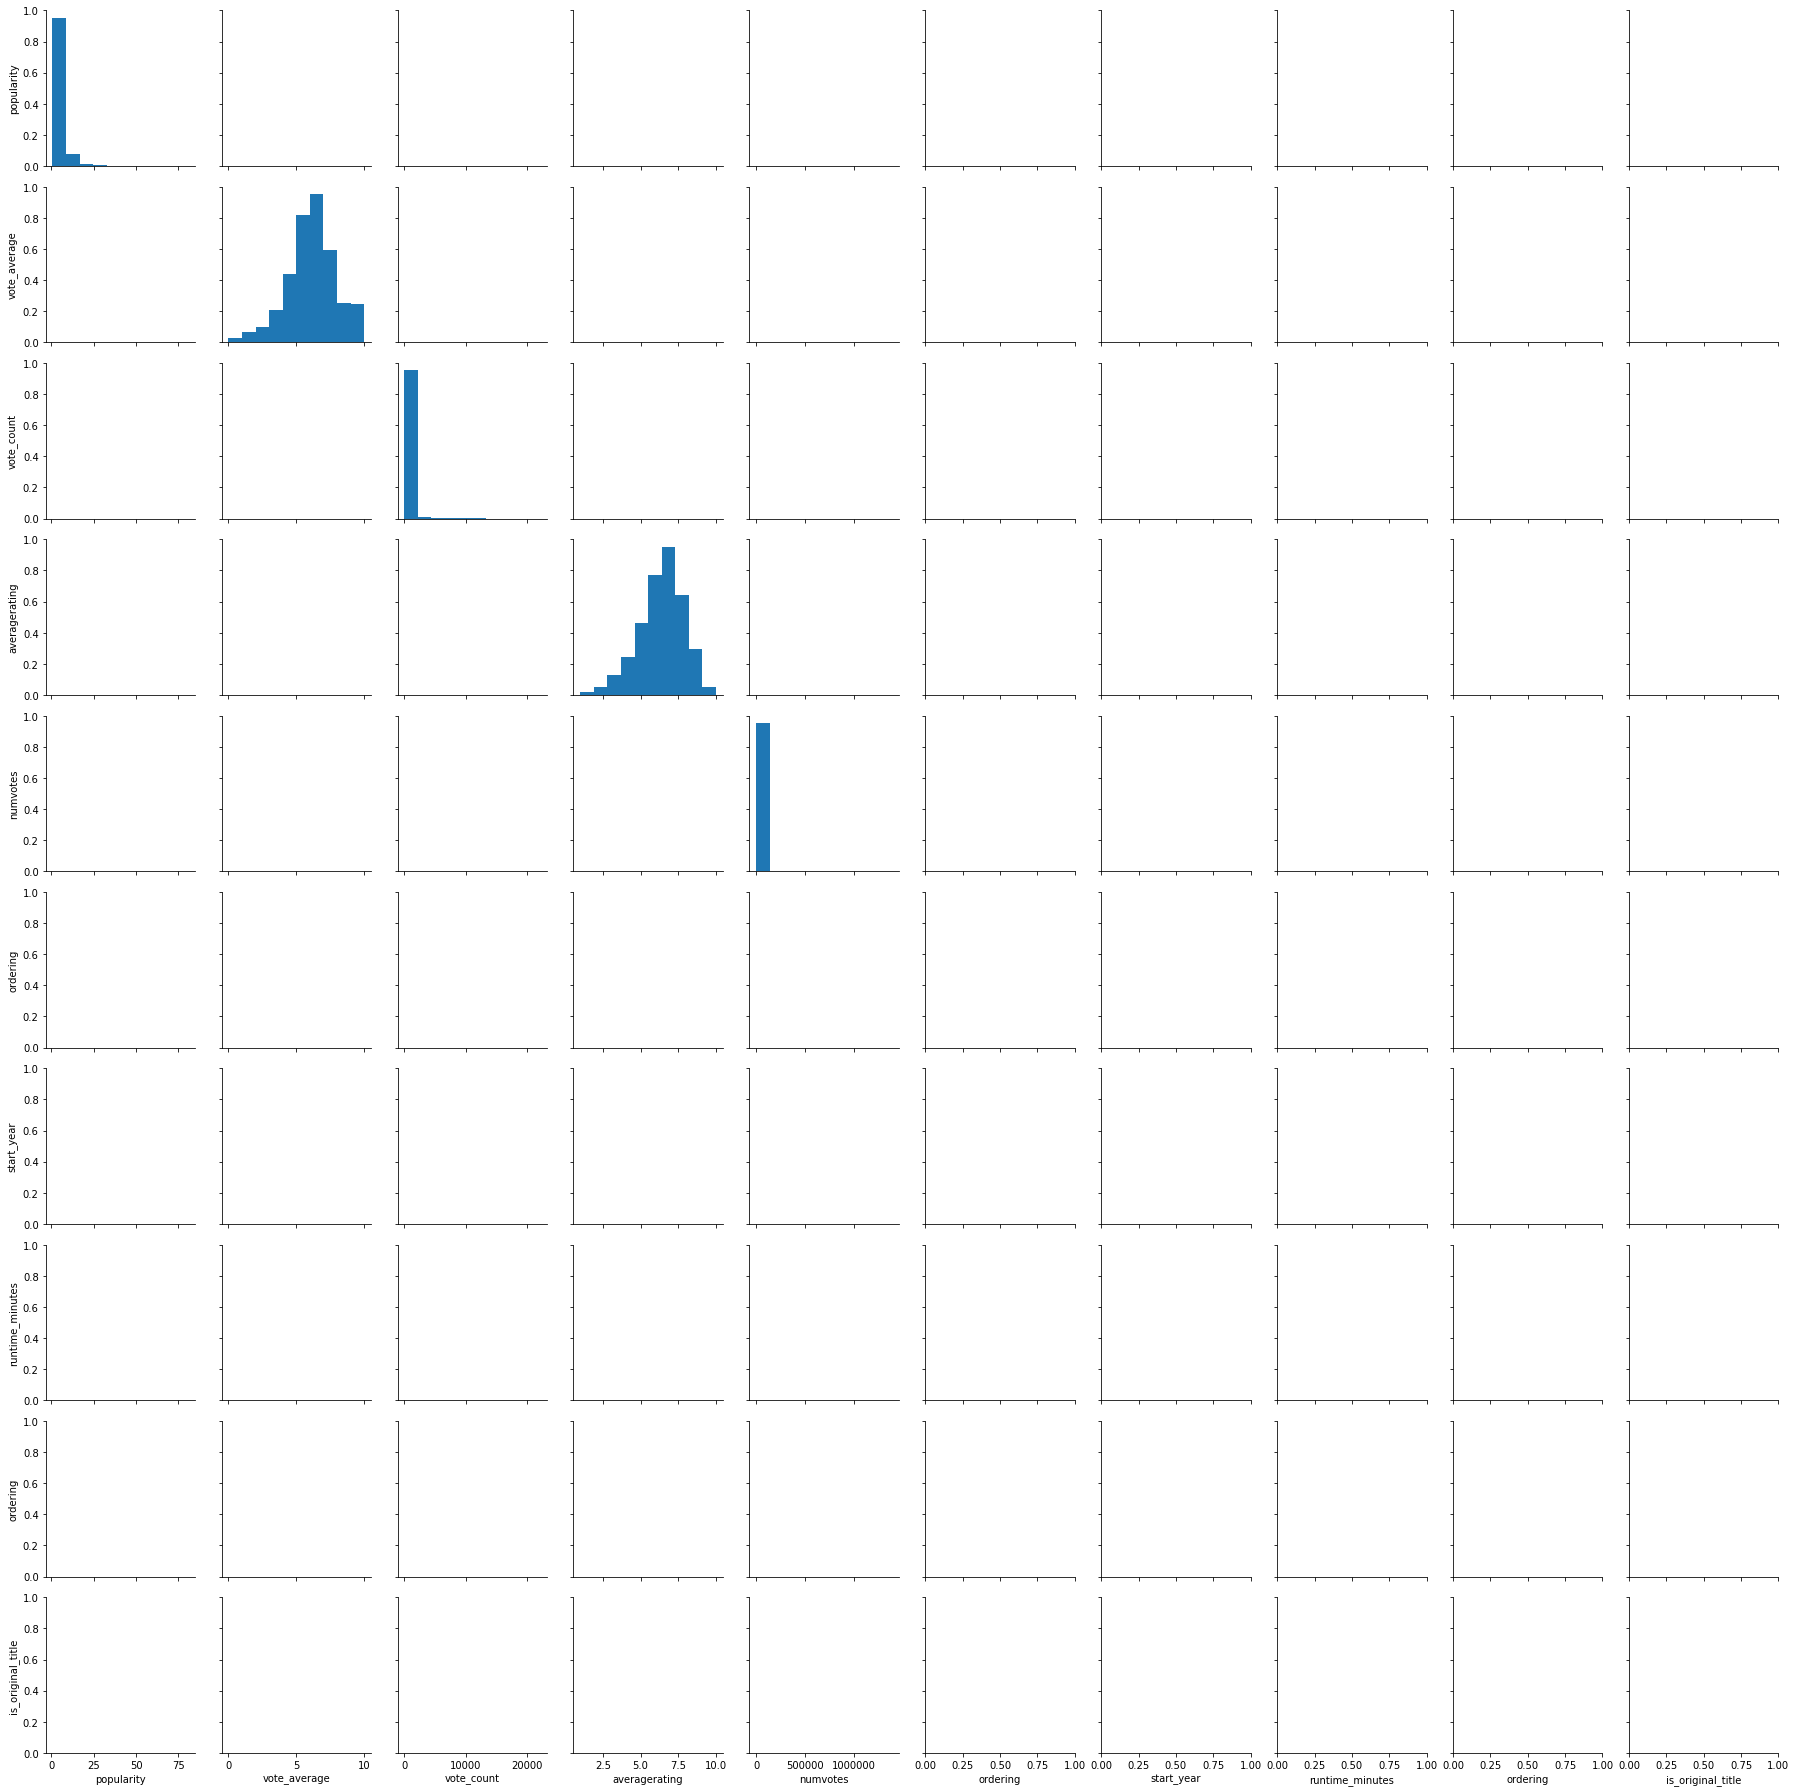

In [258]:
g = sns.pairplot(dfs)